In [19]:
import numpy as np
from pandas import Series
import matplotlib.pyplot as plt

In [36]:
# L x L 크기의 랜덤한 스핀 배열을 생성하는 함수
def S(L):
    return np.random.choice([-1, 1], size=(L, L))

# 초기화 함수: 베타에 따라 확률 배열을 설정합니다.
def initialize(beta):
    global prob
    prob = np.zeros(5)
    for i in range(2, 5, 2):
        prob[i] = np.exp(-2*beta*i)  # exp^(-4*beta)와 exp^(-8*beta)를 계산

# 랜덤한 스핀을 하나 뒤집는 함수
def single_spin_flip(matrix):
    global N, L
    i, j = np.random.randint(L), np.random.randint(L)
    new_matrix = matrix.copy()
    new_matrix[i, j] *= -1
    return new_matrix

# 스핀 배열의 에너지를 계산하는 함수
def energy(spin_matrix):
    global N, L
    total_energy = 0
    for i in range(L):
        for j in range(L):
            total_energy -= spin_matrix[i, j] * (spin_matrix[(i+1)%L, j] + spin_matrix[i, (j+1)%L])
    return total_energy

# 두 에너지 상태를 비교하고 스핀 뒤집기를 수락할지 여부를 결정하는 함수
def accept(E1, E2):
    if E2 < E1 or np.random.rand() < np.exp(beta * (E1 - E2)):
        return 1
    else:
        return 0

# 스핀 배열의 자화력을 계산하는 함수
def m(matrix):
    return np.abs(np.sum(matrix))/N

# 몬테카를로 시뮬레이션을 통해 m 값과 에너지 값을 계산하는 함수
def make_list(beta, n=10000):
    m_list = []
    E_list = []
    SL = S(L)
    for _ in range(n):
        flip_SL = single_spin_flip(SL)
        E_mu = energy(SL)
        E_nu = energy(flip_SL)
        if accept(E_mu, E_nu) == 1:
            SL = flip_SL
        m_list.append(m(SL))
        E_list.append(E_mu)
    return m_list, E_list

# 시리즈의 자기상관 함수를 계산하는 함수
def autocorr(series, lag_max):
    autocorr = np.correlate(series-np.mean(series), series-np.mean(series), mode='full')
    autocorr = autocorr[autocorr.size//2:]
    autocorr /= autocorr[0]
    return autocorr[:lag_max]

# L = 5

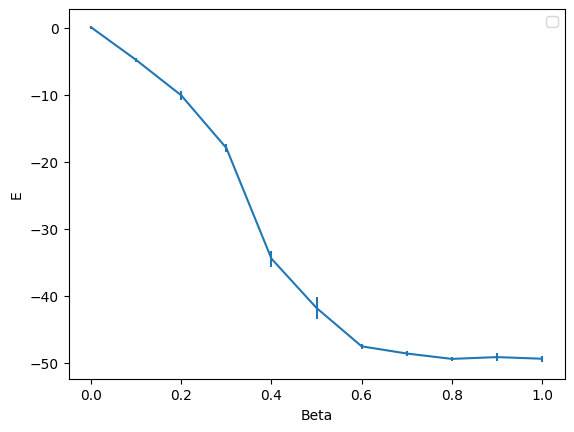

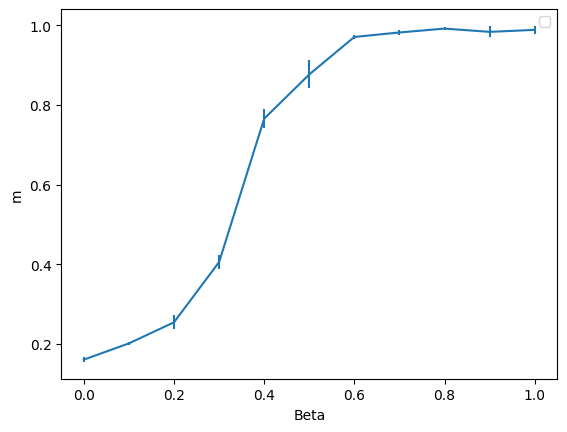

In [41]:
# 메인 코드 부분
L = 5 # 스핀 배열의 크기
N = L * L # 전체 스핀의 개수
beta_values = np.linspace(0, 1, 11) # 베타 값의 배열

# 각 베타 값에 대한 결과와 에러를 저장할 배열 초기화
results_E = np.zeros(len(beta_values))
results_m = np.zeros(len(beta_values))
errors_E = np.zeros(len(beta_values))
errors_m = np.zeros(len(beta_values))

# 베타 값에 대한 시뮬레이션 실행
for i, beta in enumerate(beta_values):
    initialize(beta)
    m_list, E_list = make_list(beta)
    results_E[i] = np.mean(E_list)
    results_m[i] = np.mean(m_list)

    # 에너지와 자화력의 자기상관 함수 계산
    E_autocorr = autocorr(np.array(E_list), 500)
    E_tau = np.sum(E_autocorr)

    m_autocorr = autocorr(np.array(m_list), 500)
    m_tau = np.sum(m_autocorr)

    # 에러 계산
    errors_E[i] = np.std(E_list)*np.sqrt(2*E_tau/len(E_list))
    errors_m[i] = np.std(m_list)*np.sqrt(2*m_tau/len(m_list))

# 에러바와 함께 에너지 그래프 그리기
plt.errorbar(beta_values, results_E, yerr=errors_E, fmt='-')
plt.xlabel('Beta')
plt.ylabel('E')
plt.legend()
plt.show()

# 에러바와 함께 자화력 그래프 그리기
plt.errorbar(beta_values, results_m, yerr=errors_m, fmt='-')
plt.xlabel('Beta')
plt.ylabel('m')
plt.legend()
plt.show()

# L = 10

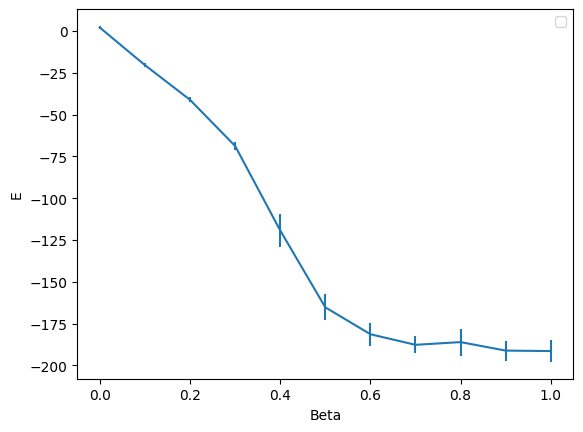

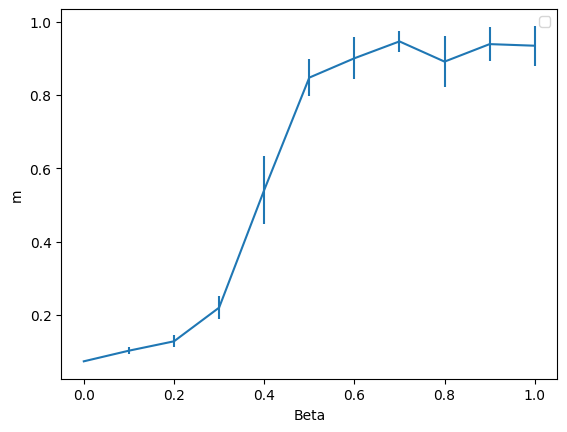

In [40]:
# 메인 코드 부분
L = 10 # 스핀 배열의 크기
N = L * L # 전체 스핀의 개수
beta_values = np.linspace(0, 1, 11) # 베타 값의 배열

# 각 베타 값에 대한 결과와 에러를 저장할 배열 초기화
results_E = np.zeros(len(beta_values))
results_m = np.zeros(len(beta_values))
errors_E = np.zeros(len(beta_values))
errors_m = np.zeros(len(beta_values))

# 베타 값에 대한 시뮬레이션 실행
for i, beta in enumerate(beta_values):
    initialize(beta)
    m_list, E_list = make_list(beta)
    results_E[i] = np.mean(E_list)
    results_m[i] = np.mean(m_list)

    # 에너지와 자화력의 자기상관 함수 계산
    E_autocorr = autocorr(np.array(E_list), 500)
    E_tau = np.sum(E_autocorr)

    m_autocorr = autocorr(np.array(m_list), 500)
    m_tau = np.sum(m_autocorr)

    # 에러 계산
    errors_E[i] = np.std(E_list)*np.sqrt(2*E_tau/len(E_list))
    errors_m[i] = np.std(m_list)*np.sqrt(2*m_tau/len(m_list))

# 에러바와 함께 에너지 그래프 그리기
plt.errorbar(beta_values, results_E, yerr=errors_E, fmt='-')
plt.xlabel('Beta')
plt.ylabel('E')
plt.legend()
plt.show()

# 에러바와 함께 자화력 그래프 그리기
plt.errorbar(beta_values, results_m, yerr=errors_m, fmt='-')
plt.xlabel('Beta')
plt.ylabel('m')
plt.legend()
plt.show()